In [1]:
%cd /mnt/i/Yuki/workspace/exercises/nlp_100_knock

/mnt/i/Yuki/workspace/exercises/nlp_100_knock


https://nlp100.github.io/ja/ch04.html

# 準備

In [2]:
import random
import json
import itertools
import collections
import re
import regex
import numpy as np
import matplotlib.pyplot as plt

# 問題

## 30. 形態素解析結果の読み込み

In [3]:
parsed_result_path = 'Question_30_39/neko.txt.mecab'

In [4]:
with open(parsed_result_path, 'r', encoding='utf8') as f:
    parsed_result = f.read()

In [5]:
sentence_infos = []
word_infos = []
for info_line in parsed_result.split('\n'):
    info = info_line.split('\t')
    if len(info) <= 1:
        if info_line == 'EOS' and word_infos:
            sentence_infos.append(word_infos)
            word_infos = []
        continue
    surface, grammer_info_line = info
    if surface == '' or surface == '\u3000':
        continue
    grammer_infos = grammer_info_line.split(',')
    pos = grammer_infos[0]
    pos1 = grammer_infos[1]
    base = grammer_infos[6]
    word_infos.append({
        'surface': surface,
        'pos': pos,
        'pos1': pos1,
        'base': base,
    })

In [6]:
word_infos = list(itertools.chain.from_iterable(sentence_infos))
word_infos[:100]

[{'surface': '一', 'pos': '名詞', 'pos1': '数', 'base': '一'},
 {'surface': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'base': '吾輩'},
 {'surface': 'は', 'pos': '助詞', 'pos1': '係助詞', 'base': 'は'},
 {'surface': '猫', 'pos': '名詞', 'pos1': '一般', 'base': '猫'},
 {'surface': 'で', 'pos': '助動詞', 'pos1': '*', 'base': 'だ'},
 {'surface': 'ある', 'pos': '助動詞', 'pos1': '*', 'base': 'ある'},
 {'surface': '。', 'pos': '記号', 'pos1': '句点', 'base': '。'},
 {'surface': '名前', 'pos': '名詞', 'pos1': '一般', 'base': '名前'},
 {'surface': 'は', 'pos': '助詞', 'pos1': '係助詞', 'base': 'は'},
 {'surface': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'base': 'まだ'},
 {'surface': '無い', 'pos': '形容詞', 'pos1': '自立', 'base': '無い'},
 {'surface': '。', 'pos': '記号', 'pos1': '句点', 'base': '。'},
 {'surface': 'どこ', 'pos': '名詞', 'pos1': '代名詞', 'base': 'どこ'},
 {'surface': 'で', 'pos': '助詞', 'pos1': '格助詞', 'base': 'で'},
 {'surface': '生れ', 'pos': '動詞', 'pos1': '自立', 'base': '生れる'},
 {'surface': 'た', 'pos': '助動詞', 'pos1': '*', 'base': 'た'},
 {'surface': 'か', 'pos': '助詞', 'p

## 31. 動詞

In [7]:
verb_surfaces = set([info['surface'] for info in word_infos if info['pos'] == '動詞'])

In [8]:
verb_surfaces

{'並べ',
 '困る',
 'かかっ',
 '崇め',
 'たのま',
 '在っ',
 'られれ',
 'のせ',
 '見送っ',
 '済ませ',
 '至ら',
 '着く',
 'かえ',
 '入り込ん',
 'かん',
 '漕ぎつけ',
 '布く',
 '突き立て',
 '待ち合せ',
 'むい',
 '引っ掻き',
 '滅する',
 '済ます',
 '述べよ',
 '砕けよ',
 '来',
 '進める',
 'いただき',
 '悟る',
 '籠っ',
 '草臥れ',
 'うなされる',
 '属する',
 'しゃべる',
 '阿',
 '講ずる',
 '曝し',
 '詠ん',
 '作る',
 '押し出し',
 '弾か',
 'もぐっ',
 '定め',
 '捧げる',
 '浚い',
 '押し出す',
 'あばれ',
 'しから',
 '驚きゃ',
 '持ち出し',
 'なすっ',
 '垂れ',
 '待っ',
 'っ',
 'おる',
 '担い',
 '誓っ',
 '任じ',
 'おっしゃら',
 'いたっ',
 '寝ぼけ',
 '寄せる',
 'くらす',
 '失せる',
 '飛び出す',
 '係ら',
 '転ずる',
 '彫り',
 '盛っ',
 '言い兼ね',
 '見下せる',
 '飲み干し',
 '答え',
 '押し込む',
 '刻ん',
 'ぶら下がる',
 '歩き',
 'おっ',
 '笑っ',
 '煮',
 '知り',
 '見捨て',
 'あしらっ',
 '降らせる',
 'つづい',
 '埋',
 '晴れ',
 '起り',
 'ぶんなぐる',
 '働け',
 '通り',
 '売',
 'かくれ',
 'みん',
 '湧き出る',
 '始め',
 '寝そべっ',
 '畳ん',
 '解く',
 'たたき',
 '抱く',
 '略する',
 '取り去る',
 '乗り越え',
 '躍ら',
 'くだら',
 '付く',
 '役に立た',
 '取れん',
 '掛り',
 '気に入ら',
 '心得る',
 '吹き',
 '振る',
 'もらう',
 '限る',
 '繰り返す',
 '減ら',
 'ひる',
 '押し寄せ',
 '食わせろ',
 '充たさ',
 'よそ',
 '名づけ',
 '生れる',
 '建つ',
 '蹶',
 '見合わせ',
 '流行り',


## 32. 動詞の原形

In [9]:
verb_bases = set([info['base'] for info in word_infos if info['pos'] == '動詞'])

In [10]:
verb_bases

{'困る',
 '見逃す',
 '除ける',
 '併せる',
 '着く',
 '別れる',
 '嵌める',
 '食み出す',
 '劃する',
 '関す',
 '見上ぐ',
 '布く',
 '滅する',
 '済ます',
 '掘る',
 '進める',
 '転げ落ちる',
 '悟る',
 'しゃべる',
 'うなされる',
 '属する',
 '誤る',
 '待ちかねる',
 '舞う',
 '講ずる',
 'ぶらさげる',
 '作る',
 '打てる',
 '捧げる',
 '押し出す',
 '迷わす',
 'おる',
 '企てる',
 'いらう',
 '寄せる',
 'くらす',
 '失せる',
 '飛び出す',
 '干す',
 '転ずる',
 '絞め殺す',
 '見下せる',
 '寄る',
 'やむを得る',
 '押し込む',
 '属す',
 'ぶら下がる',
 'やく',
 '踏みつける',
 'しごく',
 'つかう',
 '降らせる',
 '見計らう',
 'ぶんなぐる',
 '漕ぎつける',
 'つくる',
 '湧き出る',
 '取りとめる',
 'はぐる',
 '判ずる',
 'しゃがむ',
 '叶える',
 '解く',
 'そぐ',
 '撚る',
 '抱く',
 'よこす',
 '略する',
 '取り去る',
 '付く',
 '心得る',
 '振る',
 'もらう',
 '限る',
 '繰り返す',
 'たくる',
 'ひる',
 '揉む',
 '生れる',
 '建つ',
 '突っ込む',
 '漲る',
 '狂う',
 '恐る',
 '引きずる',
 '挙げる',
 '突き合せる',
 'つづける',
 'あう',
 'こびりつく',
 '窘める',
 '注す',
 '浸す',
 '懸かる',
 '吸い取る',
 '喫する',
 '供する',
 '張りつめる',
 'なれる',
 '拵える',
 '瘠せる',
 'あつめる',
 '騒ぎ出す',
 'づく',
 '追っかける',
 '選ぶ',
 '飲み込む',
 'かきまぜる',
 'かむ',
 'しだす',
 '拾う',
 '卸す',
 '徹る',
 'すまう',
 '取り留める',
 'こじ開ける',
 'むく',
 '命じる',
 '溜める',
 '出張る',
 '焦れる',
 'まつ',
 '聳える',


## 33. 「AのB」

In [11]:
extracted = []
for sentence_info in sentence_infos:
    phrase = []
    status = 'not_found'
    for word_info in sentence_info:
        if status == 'not_found':
            if word_info['pos'] == '名詞':
                phrase.append(word_info['surface'])
                status = 'noun'
        elif status == 'noun':
            if word_info['surface'] == 'の':
                phrase.append(word_info['surface'])
                status = 'genitive'
            else:
                phrase = []
                status = 'not_found'
        elif status == 'genitive':
            if word_info['pos'] == '名詞':
                phrase.append(word_info['surface'])
                extracted.append(phrase)
            phrase = []
            status = 'not_found'

In [12]:
extracted

[['彼', 'の', '掌'],
 ['掌', 'の', '上'],
 ['書生', 'の', '顔'],
 ['はず', 'の', '顔'],
 ['顔', 'の', '真中'],
 ['穴', 'の', '中'],
 ['書生', 'の', '掌'],
 ['何', 'の', '事'],
 ['肝心', 'の', '母親'],
 ['藁', 'の', '上'],
 ['笹原', 'の', '中'],
 ['池', 'の', '前'],
 ['池', 'の', '上'],
 ['一樹', 'の', '蔭'],
 ['垣根', 'の', '穴'],
 ['隣家', 'の', '三'],
 ['時', 'の', '通路'],
 ['一刻', 'の', '猶予'],
 ['家', 'の', '内'],
 ['彼', 'の', '書生'],
 ['以外', 'の', '人間'],
 ['前', 'の', '書生'],
 ['おさん', 'の', '隙'],
 ['胸', 'の', '痞'],
 ['家', 'の', '主人'],
 ['主人', 'の', '方'],
 ['鼻', 'の', '下'],
 ['吾輩', 'の', '顔'],
 ['自分', 'の', '住'],
 ['吾輩', 'の', '主人'],
 ['家', 'の', 'もの'],
 ['うち', 'の', 'もの'],
 ['彼', 'の', '書斎'],
 ['本', 'の', '上'],
 ['皮膚', 'の', '色'],
 ['本', 'の', '上'],
 ['彼', 'の', '毎夜'],
 ['主人', 'の', '傍'],
 ['彼', 'の', '膝'],
 ['経験', 'の', '上'],
 ['飯櫃', 'の', '上'],
 ['炬燵', 'の', '上'],
 ['ここ', 'の', 'うち'],
 ['供', 'の', '寝床'],
 ['彼等', 'の', '中間'],
 ['供', 'の', '一'],
 ['例', 'の', '神経'],
 ['次', 'の', '部屋'],
 ['自分', 'の', '勝手'],
 ['吾輩', 'の', '方'],
 ['台所', 'の', '板の間'],
 ['吾輩', 'の', '尊敬'],
 ['そこ', 'の', '

## 34. 名詞の連接

In [13]:
extracted = []
for sentence_info in sentence_infos:
    nouns = []
    prev_word_is_noun = False
    for word_info in sentence_info:
        if word_info['pos'] == '名詞':
            nouns.append(word_info['surface'])
            prev_word_is_noun = True
        else:
            if prev_word_is_noun:
                extracted.append(nouns)
                nouns = []
            prev_word_is_noun = False

In [14]:
[v for v in extracted if len(v) >= 2]

[['人間', '中'],
 ['一番', '獰悪'],
 ['時', '妙'],
 ['一', '毛'],
 ['その後', '猫'],
 ['一', '度'],
 ['ぷうぷうと', '煙'],
 ['邸', '内'],
 ['三', '毛'],
 ['書生', '以外'],
 ['四', '五', '遍'],
 ['この間', 'おさん'],
 ['三', '馬'],
 ['御台', '所'],
 ['まま', '奥'],
 ['住', '家'],
 ['終日', '書斎'],
 ['勉強', '家'],
 ['勉強', '家'],
 ['勤勉', '家'],
 ['二', '三', 'ページ'],
 ['主人', '以外'],
 ['限り', '吾輩'],
 ['朝', '主人'],
 ['一番', '心持'],
 ['二', '人'],
 ['一つ', '床'],
 ['一', '人'],
 ['最後', '大変'],
 ['——', '猫'],
 ['神経', '胃弱', '性'],
 ['物', '指'],
 ['尻', 'ぺたをひどく'],
 ['言語', '同断'],
 ['家内', '総', 'がかり'],
 ['筋', '向'],
 ['白', '君'],
 ['度', '毎'],
 ['白', '君'],
 ['先日', '玉'],
 ['四', '疋'],
 ['三', '日', '目'],
 ['四', '疋'],
 ['白', '君'],
 ['我', '等', '猫', '族'],
 ['家族', '的', '生活'],
 ['三', '毛', '君'],
 ['所有', '権'],
 ['我々', '同族', '間'],
 ['目', '刺'],
 ['一番', '先'],
 ['彼等', '人間'],
 ['我', '等'],
 ['吾', '人'],
 ['白', '君'],
 ['三', '毛', '君'],
 ['間違い', 'だらけ'],
 ['後架', '先生'],
 ['宗', '盛'],
 ['宗', '盛'],
 ['月給', '日'],
 ['水彩', '絵具'],
 ['毎日', '毎日', '書斎'],
 ['人', 'の'],
 ['自ら', '筆'],
 ['眼鏡', '越'],
 ['一室', '内']

## 35. 単語の出現頻度

In [15]:
word_counter = collections.Counter([word_info['base'] for word_info in word_infos])
words = sorted(word_counter.items(), key=lambda x: x[1], reverse=True)

In [16]:
words

[('の', 9194),
 ('。', 7486),
 ('て', 6848),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5972),
 ('と', 5508),
 ('が', 5337),
 ('た', 4267),
 ('する', 3657),
 ('「', 3231),
 ('」', 3225),
 ('ない', 3052),
 ('も', 2479),
 ('ある', 2320),
 ('*', 2191),
 ('で', 2084),
 ('から', 2031),
 ('いる', 1777),
 ('ん', 1568),
 ('か', 1529),
 ('云う', 1408),
 ('事', 1207),
 ('です', 1164),
 ('ます', 1146),
 ('なる', 1120),
 ('へ', 1034),
 ('う', 987),
 ('もの', 981),
 ('君', 973),
 ('主人', 932),
 ('ぬ', 719),
 ('よう', 696),
 ('見る', 675),
 ('ね', 657),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 546),
 ('何', 539),
 ('思う', 502),
 ('よ', 502),
 ('吾輩', 481),
 ('来る', 460),
 ('れる', 450),
 ('じゃ', 450),
 ('…', 433),
 ('これ', 414),
 ('さ', 410),
 ('それ', 381),
 ('聞く', 347),
 ('でも', 346),
 ('時', 345),
 ('行く', 340),
 ('出来る', 324),
 ('三', 319),
 ('出る', 317),
 ('な', 317),
 ('まで', 313),
 ('ところ', 313),
 ('方', 312),
 ('やる', 311),
 ('二', 303),
 ('上', 294),
 ('いい', 294),
 ('寒月', 286),
 ('顔', 282),


## 36. 頻度上位10語

<BarContainer object of 10 artists>

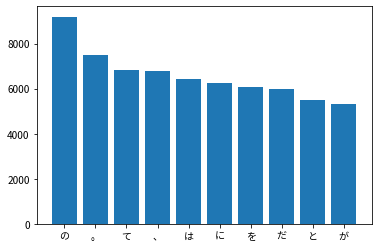

In [17]:
N = 10

labels, heights = zip(*words[:N])
xs = np.arange(N) + 1

plt.bar(xs, heights, tick_label=labels, align="center")

## 37. 「猫」と共起頻度の高い上位10語

In [18]:
extracted = []
for sentence_info in sentence_infos:
    for word_info in sentence_info:
        if word_info['base'] == '猫':
            extracted += [word_info['base'] for word_info in sentence_info]
            break

In [19]:
word_counter = collections.Counter(extracted)
words = sorted(word_counter.items(), key=lambda x: x[1], reverse=True)

<BarContainer object of 10 artists>

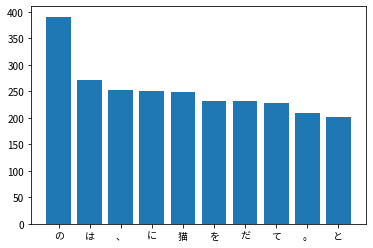

In [20]:
N = 10

labels, heights = zip(*words[:N])
xs = np.arange(N) + 1

plt.bar(xs, heights, tick_label=labels, align="center")

## 38. ヒストグラム

In [21]:
word_counter = collections.Counter([word_info['base'] for word_info in word_infos])
words = sorted(word_counter.values(), reverse=True)

(array([4715., 1906.,  957.,  603.,  459.,  324.,  241.,  207.,  159.,
         125.,  120.,  119.,   83.,   96.,   74.,   52.,   49.,   57.,
          46.,   43.,   30.,   29.,   31.,   34.,   21.,   19.,   25.,
          19.,   22.,   22.,   12.,   16.,   13.,   14.,   19.,   17.,
           8.,   14.,   10.,   13.,   15.,   10.,    7.,    9.,   11.,
           9.,    8.,    8.,   10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <BarContainer object of 49 artists>)

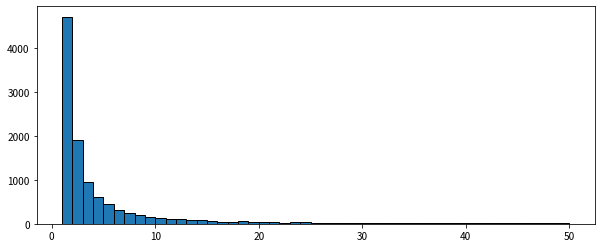

In [22]:
plt.figure(figsize=(10, 4))
plt.hist(words, bins=49, range=(1, 50), ec='black')

## 39. Zipfの法則

In [23]:
word_counts = sorted(collections.Counter([word_info['base'] for word_info in word_infos]).values(), reverse=True)

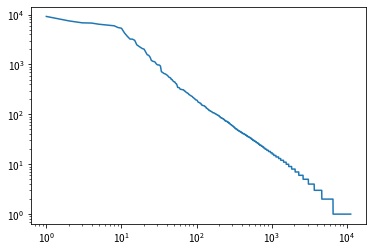

In [24]:
ranks = np.arange(len(word_counts)) + 1
plt.plot(ranks, word_counts)
plt.xscale('log')
plt.yscale('log')